# K Nearest Neighbor Classification

In [29]:
import numpy as np    # For array operations
import pandas as pd   # For DataFrames
import matplotlib.pyplot as plt    # For plotting
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load Data

In [30]:
train = pd.read_csv('train_sample.csv')
test = pd.read_csv('test_sample.csv')

### Split X and y

In [31]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

print(X_train.shape)
print(y_train.shape)

(5000, 784)
(5000,)


In [32]:
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

print(X_test.shape)
print(y_test.shape)

(1000, 784)
(1000,)


## Check Visually (Optional)

In [33]:
x1 = X_train.iloc[0,:].values.reshape(28,28)

In [34]:
x1[x1 > 0] = 1

In [35]:
x1 = pd.DataFrame(x1)

In [36]:
x1.to_csv("one.csv")

## Plot 5 random samples from train and test

In [37]:
train_sample = np.random.choice(range(0,X_train.shape[0]),replace=False,size=5)
test_sample = np.random.choice(range(0,X_test.shape[0]),replace=False,size=5)

In [38]:
train_sample

array([ 378, 2710, 3327, 2778, 1251])

In [39]:
test_sample

array([676, 441, 813, 864,  11])

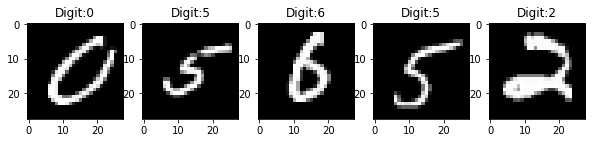

In [40]:
plt.figure(figsize=(10,5))
for i,j in enumerate(train_sample):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train.iloc[j,:].values.reshape(28,28))
    plt.title("Digit:"+str(y_train[j]))
    plt.gray()

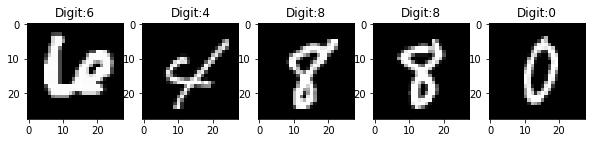

In [41]:
plt.figure(figsize=(10,5))
for i,j in enumerate(test_sample):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test.iloc[j,:].values.reshape(28,28))
    plt.title("Digit:"+str(y_test[j]))
    plt.gray()

## Classification without parameter tuning

In [42]:
knn_classifier = KNeighborsClassifier(n_neighbors=3,weights="distance",algorithm="brute")

In [43]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

In [44]:
pred_test = knn_classifier.predict(X_test)

## Confusion Matrix

In [45]:
cm_test = confusion_matrix(y_pred=pred_test, y_true=y_test)

print(cm_test)

[[ 98   0   0   0   0   0   2   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  1   2  96   0   0   0   0   1   0   0]
 [  0   0   1  88   0   3   1   3   1   3]
 [  0   2   0   0  89   0   0   1   0   8]
 [  0   1   0   3   0  93   2   0   1   0]
 [  0   0   0   0   0   2  98   0   0   0]
 [  0   2   0   0   0   0   0  95   0   3]
 [  1   0   2   2   0   3   0   1  90   1]
 [  0   0   0   0   2   0   0   4   0  94]]


## Accuracy

In [46]:
sum(np.diag(cm_test))/np.sum(cm_test)

# np.trace(cm_test)/np.sum(cm_test)

0.941

## Misclassified points

In [47]:
misclassified = y_test[pred_test != y_test] 

In [48]:
## First 5 misclassified points
misclassified.index[:5]

Int64Index([83, 97, 224, 246, 286], dtype='int64')

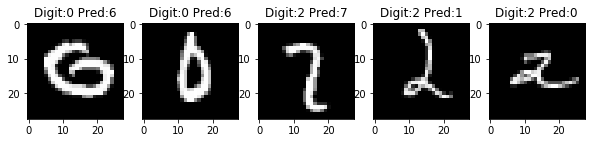

In [49]:
plt.figure(figsize=(10,5))
for i,j in enumerate(misclassified.index[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test.iloc[j,:].values.reshape(28,28))
    plt.title("Digit:"+str(y_test[j])+" "+"Pred:"+str(pred_test[j]))
    plt.gray()

## Model Building

In [50]:
knn_classifier = KNeighborsClassifier(algorithm="brute",weights="distance")

In [51]:
# params = {"n_neighbors": [1,3,5],"metric": ["euclidean", "cityblock"]}

params = {"n_neighbors": [1],"metric": ["euclidean", "cityblock"]}

In [52]:
grid = GridSearchCV(knn_classifier,param_grid=params,scoring="accuracy",cv=3)

In [53]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1], 'metric': ['euclidean', 'cityblock']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [54]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 1}

## K-NN Regression

In [25]:
## Randomly Generate some Data

data  = pd.DataFrame(np.random.randint(low = 2,high = 100,size = (1000, 4)),
                     columns=["Target","A","B","C"])

In [26]:
data.head(5)

,Target,A,B,C
0,5,70,53,88
1,96,93,7,29
2,14,12,44,17
3,41,97,60,34
4,69,56,77,36


In [27]:
train_x,test_x,train_y,test_y = train_test_split(data.iloc[:,1:],data.Target,test_size = 0.2)

print(train_x.shape, test_x.shape)

(800, 3) (200, 3)


In [44]:
scaler = MinMaxScaler()

scaler.fit(train_x)

/home/kumar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [45]:
scaled_train_x = pd.DataFrame(scaler.transform(train_x),columns=["A","B","C"])
scaled_test_x = pd.DataFrame(scaler.transform(test_x),columns=["A","B","C"])

### Model Building without Parameter Tuning

In [46]:
knn_regressor = KNeighborsRegressor(n_neighbors=3,algorithm="brute",weights="distance")

In [47]:
knn_regressor.fit(scaled_train_x, train_y)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='distance')

In [48]:
test_pred = knn_regressor.predict(scaled_test_x)

In [52]:
mean_squared_error(test_y,test_pred)

1164.818929640467

## With paramater Tuning

In [83]:
knn_regressor = KNeighborsRegressor(algorithm="brute",weights="distance")

In [84]:
params = {"n_neighbors": [1,3,5],"metric": ["euclidean", "cityblock"]}

In [85]:
grid = GridSearchCV(knn_regressor,param_grid=params,scoring="neg_mean_squared_error",cv=5)

In [86]:
grid.fit(scaled_train_x, train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='distance'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5], 'metric': ['euclidean', 'cityblock']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [87]:
grid.best_params_

{'metric': 'cityblock', 'n_neighbors': 5}

In [88]:
test_pred_cv = grid.predict(scaled_test_x)

In [90]:
mean_squared_error(test_y,test_pred_cv)

1033.8222434310273

In [91]:
## custom defined mse
def mse(predictions,y):
    mse = (((predictions - y) ** 2).sum()) / len(predictions)
    return mse

In [92]:
mse(test_y,test_pred_cv)

1033.8222434310273